In [58]:
import numpy as np
from itertools import product
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import time

m = 5
n = 400 # 400, 800, 1200, 1600, 2000
DEBUG = True

def fPC (y, yhat):
    return np.mean(y == yhat)

def measureAccuracyOfPredictors (predictors, X, y):
    yhat = np.zeros(y.shape)
    for r1,c1,r2,c2 in predictors:
        yhat += X[:,r1,c1] > X[:,r2,c2]
    yhat = yhat/len(predictors) > 0.5
    return fPC(y, yhat)

def stepwiseRegression(trainingFaces, trainingLabels, testingFaces, testingLabels):
    
    start_time = time.time()
    best, loc = 0, None
    preds = [] # predictors
    pixels = [x for x in product(range(0,24), repeat = 4) 
              if (x[0],x[1]) != (x[2],x[3])]
    
    for i in range(m):
        
        if DEBUG:
            print("Current Step : ", i)
            print(f'{round((time.time() - start_time)/60, 3)} minutes elapsed')
            
        for p in pixels:
            if p in preds: continue
            acc, yh = measureAccuracyOfPredictors(preds + [p], X=trainingFaces, y=trainingLabels)            
            best = max(acc, best)
            loc = p if best == acc else loc
            
        
        if DEBUG:
            print("Best pixels : ", loc)
            print("Best Accuracy : ", best)
        
        preds.append(loc)

    show = True
    if show:
        im = testingFaces[0,:,:]
        fig,ax = plt.subplots(1)
        ax.imshow(im, cmap='gray')
        
        for r1,c1,r2,c2 in predictors:
            color = np.random.rand(3,)
            rect = patches.Rectangle((c1 - 0.5, r1 - 0.5), 1, 1, linewidth=2, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
            rect = patches.Rectangle((c2 - 0.5, r2 - 0.5), 1, 1, linewidth=2, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
        
        plt.show()
        
        
    return preds

def loadData (which):
    faces = np.load("{}ingFaces.npy".format(which))
    faces = faces.reshape(-1, 24, 24)  # Reshape from 576 to 24x24
    labels = np.load("{}ingLabels.npy".format(which))
    return faces, labels


In [41]:
import numpy as np
from itertools import product
import matplotlib.patches as patches
import matplotlib.pyplot as plt

m, n = 5, 400 # 400, 800, 1200, 1600, 2000

def fPC (y, yhat):
    return np.mean(y == yhat)

def measureAccuracyOfPredictors1 (predictors, X, y):
#     print(predictors)
    yhat = np.zeros(y.shape)
    for r1,c1,r2,c2 in predictors:
#         print(r1,c1,r2,c2)
        yhat += X[:,r1,c1] > X[:,r2,c2]
    yhat = yhat/len(predictors) > 0.5
    return fPC(y, yhat), yhat

def stepwiseRegression1(trainingFaces, trainingLabels,
                        testingFaces, testingLabels):
    
#     v_acc = np.vectorize(measureAccuracyOfPredictors1, excluded=['X','y'])

    start_time = time.time()
    best, loc = 0, None
    preds = [] # predictors
    pixels = [x for x in product(range(0,24), repeat = 4) 
              if (x[0],x[1]) != (x[2],x[3])]
    
    for i in range(m):
#         vacc = v_acc(pixels, X=trainingFaces[:10], y=trainingLabels[:10])
        print("Current Step : ", i)
        print(f'{round((time.time() - start_time)/60, 3)} minutes elapsed')
        for p in pixels:
            if p in preds: continue
            acc, yh = measureAccuracyOfPredictors1(preds + [p], X=trainingFaces, y=trainingLabels)
            
            if acc == best:
                print(best, loc, '\n', acc, p)
            
            best = max(acc, best)
            loc = p if best == acc else loc
            
        
        print("Best pixels : ", loc)
        print("Best Accuracy : ", best)
        preds.append(loc)
    return preds

Current Step :  0
0.003 minutes elapsed
Best pixels :  (21, 16, 17, 7)
Best Accuracy :  0.715
Current Step :  1
0.196 minutes elapsed
Best pixels :  (13, 4, 11, 14)
Best Accuracy :  0.76
Current Step :  2
0.428 minutes elapsed
Best pixels :  (17, 7, 15, 7)
Best Accuracy :  0.82
Current Step :  3
0.703 minutes elapsed
Best pixels :  (11, 4, 2, 22)
Best Accuracy :  0.84
Current Step :  4
1.016 minutes elapsed
Best pixels :  (18, 10, 12, 8)
Best Accuracy :  0.865


NameError: name 'numpy' is not defined

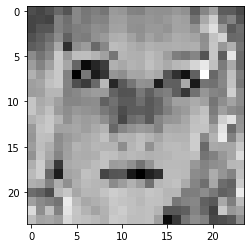

In [60]:
testingFaces, testingLabels = loadData("test")
trainingFaces, trainingLabels = loadData("train")
predictors = stepwiseRegression(trainingFaces[:200], trainingLabels[:200], testingFaces, testingLabels)
print(predictors)

In [32]:
measureAccuracyOfPredictors(predictors, testingFaces, testingLabels)

0.7527352297592997

In [56]:
testingFaces, testingLabels = loadData("test")
trainingFaces, trainingLabels = loadData("train")
for a in range(1,6):
    predictors = stepwiseRegression(trainingFaces[:400*a], trainingLabels[:400*a], testingFaces, testingLabels)

400
(2000, 24, 24)
(400, 24, 24)
800
(2000, 24, 24)
(400, 24, 24)
1200
(2000, 24, 24)
(400, 24, 24)
1600
(2000, 24, 24)
(400, 24, 24)
2000
(2000, 24, 24)
(400, 24, 24)
[(20, 7, 17, 7), (13, 5, 11, 13), (20, 17, 16, 17), (12, 18, 10, 13), (19, 11, 14, 7)]


In [ ]:
preds = [(20, 7, 17, 7), (13, 5, 11, 13), (20, 17, 16, 17), (12, 18, 10, 13), (19, 11, 14, 7)]

im = testingFaces[0,:,:]
fig,ax = plt.subplots(1)
ax.imshow(im, cmap='gray')

for r1,c1,r2,c2 in predictors:
    color = numpy.random.rand(3,)
    rect = patches.Rectangle((c1 - 0.5, r1 - 0.5), 1, 1, linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    rect = patches.Rectangle((c2 - 0.5, r2 - 0.5), 1, 1, linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(rect)

plt.show()